In [1]:
print("optimagic")

optimagic


In [2]:
!pip install optimagic

In [3]:
import numpy as np
import pandas as pd

import optimagic as om

In [4]:
def sphere(params):
    return params @ params   #just sum of squares

In [5]:
lbfgsb_res = om.minimize(
    fun=sphere,
    params=np.arange(5),   #[0, 1, 2, 3, 4]
    algorithm="scipy_lbfgsb", #Limited-memory BFGS
)

lbfgsb_res.params.round(5)

array([ 0., -0., -0., -0., -0.])

In [6]:
def dict_sphere(params):
    return params["a"] ** 2 + params["b"] ** 2 + (params["c"] ** 2).sum() #similar to sum of squares

In [7]:
nm_res = om.minimize(
    fun=dict_sphere,
    params={"a": 0, "b": 1, "c": pd.Series([2, 3, 4])},  #parameters can be dictionaries or nested structures
    algorithm="scipy_neldermead",
)

nm_res.params

{'a': 3.885293415171424e-09,
 'b': -9.144916295625622e-09,
 'c': 0   -6.348281e-09
 1   -4.599364e-09
 2   -2.724007e-09
 dtype: float64}

In [8]:
!pip install -U kaleido

In [9]:
!pip install -U kaleido

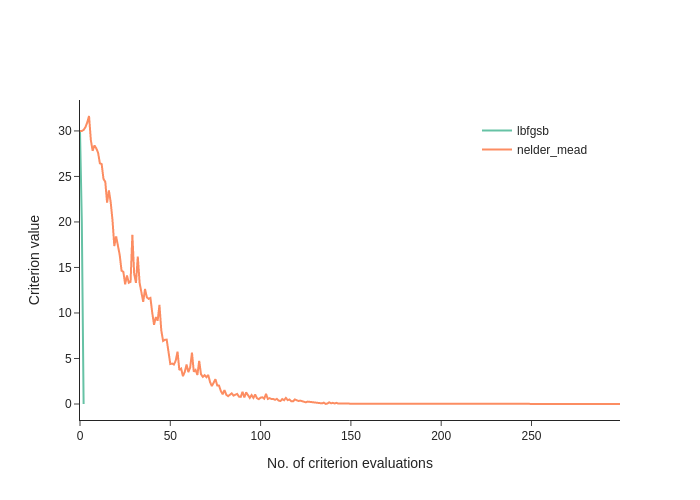

In [10]:
results = {"lbfgsb": lbfgsb_res, "nelder_mead": nm_res}
fig = om.criterion_plot(results, max_evaluations=300)  #max_evaluation : no of steps in optimisation
fig.show(renderer="png")

lbfgsb converged faster than nelder_mead

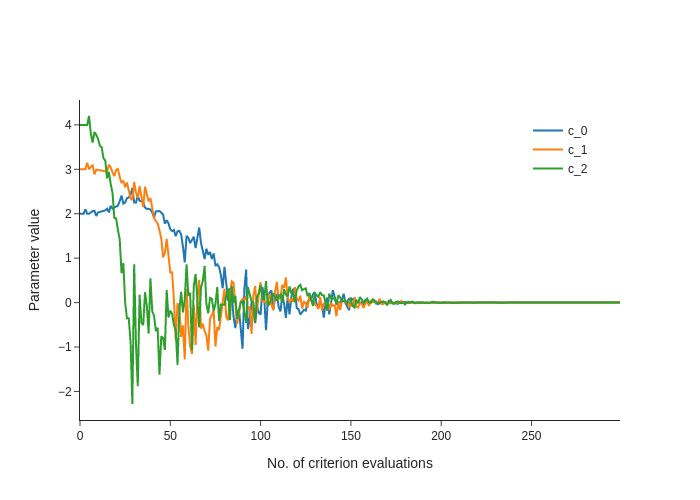

In [11]:
fig = om.params_plot(
    nm_res,
    max_evaluations=300,
    # optionally select a subset of parameters to plot
    selector=lambda params: params["c"],
)
fig.show(renderer="png")  #just selecting the c parameters

In [12]:
bounds = om.Bounds(lower=np.arange(5) - 2, upper=np.array([10, 10, 10, np.inf, np.inf]))
#[-2, -1, 0, 1, 2]  [10, 10, 10, np.inf, np.inf]
res = om.minimize(
    fun=sphere,
    params=np.arange(5),
    algorithm="scipy_lbfgsb",
    bounds=bounds,
)

res.params.round(5)

array([0., 0., 0., 1., 2.])

In [14]:
res = om.minimize(
    fun=sphere,
    params=np.arange(5),  # Initial params: [0, 1, 2, 3, 4]
    algorithm="scipy_lbfgsb",
    constraints=om.FixedConstraint(selector=lambda params: params[[1, 3]]),
)
res.params.round(5)  #fixing 1 and 3 index

array([ 0.,  1., -0.,  3.,  0.])

maximization problem --> minimization problem

f(x)=−(x12​+x22​+⋯+xn2​)

In [15]:
def upside_down_sphere(params):
    return -params @ params  # Negated sum of squares

res = om.maximize(
    fun=upside_down_sphere,
    params=np.arange(5),  # Initial params: [0, 1, 2, 3, 4]
    algorithm="scipy_bfgs",
)

print(res.params.round(5))


[ 0.  0.  0.  0. -0.]


###Numerical differentiation

Since the function is:
f(p0,p1,...,pn)=p02+p12+...+pn2
f(p0​,p1​,...,pn​)=p02​+p12​+...+pn2​

The partial derivative with respect to pipi​ is:
∂f∂pi=2pi
∂pi​∂f​=2pi​

So the gradient (first derivative) at [0, 1, 2, 3, 4] is:

In [16]:
def fun(params):
    return params @ params

In [17]:
fd = om.first_derivative(
    func=fun,
    params=np.arange(5),
)

fd.derivative

array([0., 2., 4., 6., 8.])

In [21]:
sd = om.second_derivative(
    func=fun,
    params=np.arange(5),
)

sd.derivative.round(3)  #Hessian matrix Yeeee

array([[ 2.001,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  2.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  2.   ,  0.   , -0.   ],
       [ 0.   ,  0.   ,  0.   ,  2.   ,  0.   ],
       [ 0.   ,  0.   , -0.   ,  0.   ,  2.   ]])

parallelize

In [22]:
sd = om.second_derivative(
    func=fun,
    params=np.arange(5),
    n_cores=4,
)

sd.derivative.round(3)

array([[ 2.001,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  2.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  2.   ,  0.   , -0.   ],
       [ 0.   ,  0.   ,  0.   ,  2.   ,  0.   ],
       [ 0.   ,  0.   , -0.   ,  0.   ,  2.   ]])

https://docs.jax.dev/en/latest/pytrees.html